<a href="https://colab.research.google.com/github/JordiCarrasco6/Simulaci-Sistemes-Nano/blob/main/Homework_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **EXERCICI 1**

**a) Equacions que descriuen l'evolució de la posició i la velocitat pel mètode de Feynmann.**

In [ ]:
def feynman_update(x,v,a,dt):
  x_new=x+v*dt+0.5*a*dt**2
  v_new=v+a*dt
  return x_new, v_new

In [ ]:
def velocity_verlet_update(x,v,a,dt,force_function,mass):
  x_new=x+v*dt+0.5*a*dt**2
  a_new=force_function(x_new)/mass
  v_new=v+0.5*(a+a_new)*dt
  return x_new,v_new,a_new


Un cop ja estan definides les equacions, mitjançant un gràfic podrem fer la comparació entre els dos mètodes diferents.
Per fer-ho, haurem d'importar les biblioteques necessàries i haurem de definir certs valors per als dosmètodes.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def force_harmonic(x):
  k=1
  return -k*x

In [ ]:
m=1
dt=0.01
n_steps=1000
xfey, vfey=1,0
xver,vver=1,0
aver=force_harmonic(xver)/m

xfey_list, vfey_list=[],[] #generem llistes vuides per després omplir-les.
xver_list,vver_list=[],[]


In [ ]:
for _ in range(n_steps):
  xfey,vfey=feynman_update(xfey,vfey,force_harmonic(xfey)/m,dt)
  xver,vver,aver=velocity_verlet_update(xver,vver,aver,dt,force_harmonic,m)
  xfey_list.append(xfey)
  vfey_list.append(vfey_list)
  xver_list.append(xver)
  vver_list.append(vver_list)

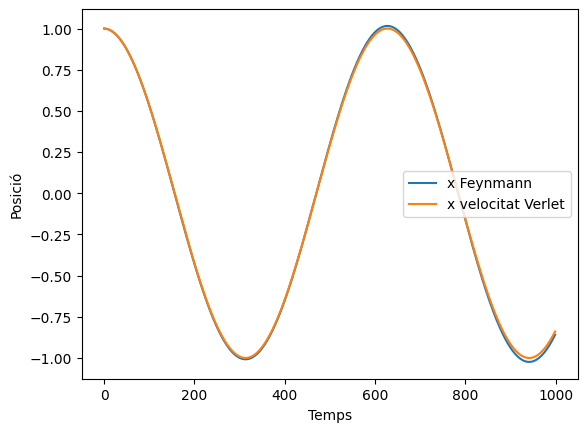

In [ ]:
plt.plot(xfey_list,label='x Feynmann')
plt.plot(xver_list,label='x velocitat Verlet')
plt.xlabel('Temps')
plt.ylabel('Posició')
plt.legend()
plt.show()

Podem veure que son pàcticament iguals.

**b) Conservació de l'energia.**

Definim l'energia total i les constants

In [ ]:
def energia_total(x,v,force_function,mass):
  cinetica=0.5*mass*v**2
  potencial=-force_function(x)*x
  return cinetica+potencial

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
k=1
m=1
def force_harmonic(x):
  return -k*x

In [ ]:
dt=0.01
n_steps=1000
xfey,vfey=1,0
xver,vver=1,0
aver=force_harmonic(xver)/m

In [ ]:
E_fey=[]
E_ver=[]

In [ ]:
for _ in range(n_steps):
  xfey,vfey=feynman_update(xfey,vfey,force_harmonic(xfey)/m,dt)
  E_fey.append(energia_total(xfey,vfey,force_harmonic,m))

  xver,vver,aver=velocity_verlet_update(xver,vver,aver,dt,force_harmonic,m)
  E_ver.append(energia_total(xver,vver,force_harmonic,m))

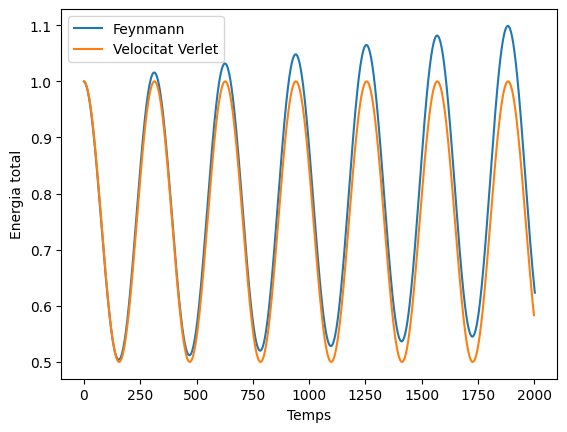

In [ ]:
plt.plot(E_fey,label='Feynmann')
plt.plot(E_ver,label='Velocitat Verlet')
plt.xlabel('Temps')
plt.ylabel('Energia total')
plt.legend()
plt.show()

## **EXERCICI 2**

**Equació d'Schrodinger**

Per fer aquest exercici en aquest cas hem de començar definint ES, tant en el cas de les unitats en el SI com per les unitats atòmiques.

In [ ]:
def schrodinger_si(hbar,m,V,psi):
  return(-hbar**2/(2*m))*np.gradient(np.gradient(psi))+V*psi

In [ ]:
def schrodinger_atomic(V,psi):
  return(-0.5)*np.gradient(np.gradient(psi))+V*psi

Un cop definides, ja podem donar valor a les constants seguint algun dels exercicis, això ens servirà com a exemple.

In [ ]:
x=np.linspace(-5,5,150) #Aques comando ens permet dir cada quant i fins quant agafem valors.
V=0.5*x**2
psi=np.exp(-x**2)

In [ ]:
psi_SI=schrodinger_si(1.054e-34,9.11e-31,V,psi) #valors de les constants definides anteriorment
psi_at=schrodinger_atomic(V,psi)

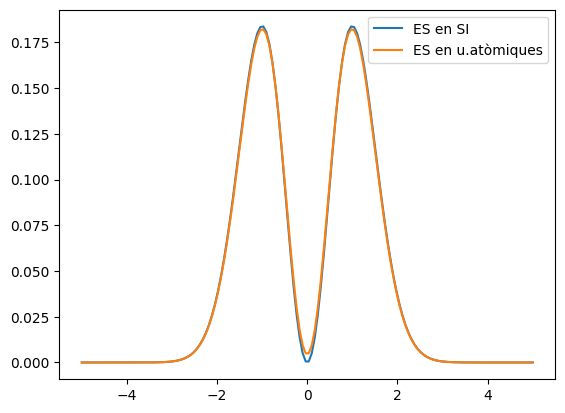

In [ ]:
plt.plot(x,psi_SI,label='ES en SI')
plt.plot(x,psi_at,label='ES en u.atòmiques')
plt.legend()
plt.show()


En la gràfica es mostren les dues representacions de les equacions. Veiem que hi ha una petita diferencia, i si variem el número de valors equidistants(en el codi np.linspace(valor mínim, valor màxim, nombre de valors equidistants), és a dir, el nombre de punts que posem a la gràcifa entre els límits imposats, podem fer que la definició de les gràfiques variir, assemblant-se més o menys.